# Finding the Best Markets to Advertise In

We work for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. 

We want to promote our product and we'd like to invest some money in advertisement. We've been tasked to find the two best markets to advertise our product in.

## Understanding the Data
Organizing surverys for a couple different markets to find out which would be best for advertising turns out to be very costly. We decide to explore cheaper options first.

A particularly good dataset worth exploring is freeCodeCamp's 2017 New Code Survey. This survey seems to have attracted new coders with varying interests.

In [1]:
#importing our necessaries
import pandas as pd

In [2]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [3]:
print(survey.shape)
pd.options.display.max_columns=150
survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [4]:
survey.dtypes

Age                       float64
AttendedBootcamp          float64
BootcampFinish            float64
BootcampLoanYesNo         float64
BootcampName               object
BootcampRecommend         float64
ChildrenNumber            float64
CityPopulation             object
CodeEventConferences      float64
CodeEventDjangoGirls      float64
CodeEventFCC              float64
CodeEventGameJam          float64
CodeEventGirlDev          float64
CodeEventHackathons       float64
CodeEventMeetup           float64
CodeEventNodeSchool       float64
CodeEventNone             float64
CodeEventOther             object
CodeEventRailsBridge      float64
CodeEventRailsGirls       float64
CodeEventStartUpWknd      float64
CodeEventWkdBootcamps     float64
CodeEventWomenCode        float64
CodeEventWorkshops        float64
CommuteTime                object
CountryCitizen             object
CountryLive                object
EmploymentField            object
EmploymentFieldOther       object
EmploymentStat

## Quick Dataset Review

Most of the courses we offer are on web and mobile development, but there are also domains covered (data science, game development, etc.).

We're looking to gain more insights about the populations of new coders that re interested in the subjects we teach. These insights will help inform us on which markets are most suitable to advertise in.

We'd like to know:

- Where are these coders located
- Locations of with the greatest number of new coders
- How much new coders are willing to spend on learning

Before digging in and analyzing the sample data, let's verify that this dataset is 

1. Representative of the target population
2. Has the right categories of people for our purpose

In [5]:
survey['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                           11.770595
  Front-End Web Developer                                                                                                                                                                           6.435927
  Data Scientist                                                                                                                                                                                    2.173913
Back-End Web Developer                                                                                                                                                                              2.030892
  Mobile Developer                                                                                                                                                                  

It would seems that the top desired job roles of those surveyed aligns closely to what we're able to offer to offer to them in terms of education and training.  

1. Full-Stack Web Developer: 11.77%
2. Front-End Web Developer: 6.44%
3. Data Scientist: 2.17%
4. Back-End Web Developer: 2.03%
5. Mobile Developer: 1.67%

Around 21.9% of participants noted mobile and web development as roles they'd be interested in. This aligns perfectly with the courses we focus on.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, in the next code block, we'll:

Split each string in the JobRoleInterest column to find the number of options for each participant.
We'll first drop the null values because we can't split Nan values.
Generate a frequency table for the variable describing the number of options.

In [6]:
# Split each string in the 'JobRoleInterest' column
interests_no_null = survey['JobRoleInterest'].dropna()
interests_split = interests_no_null.str.split(',')

In [7]:
# Split each string in the 'JobRoleInterest' column
num_options = interests_split.apply(lambda x: len(x)) #x in a list of job options
num_options.value_counts(normalize=True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

It turns out that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

In [8]:
#frequency table
web_mob_dev = interests_no_null.str.contains('Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_mob_dev.value_counts(normalize=True)*100


True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


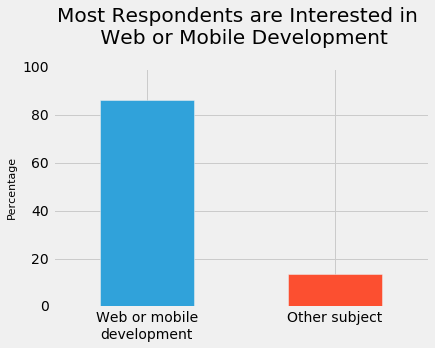

In [9]:
print(freq_table)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
freq_table.plot.bar()
plt.title('Most Respondents are Interested in \n Web or Mobile Development', y=1.08)
plt.ylabel('Percentage', fontsize=11)
plt.xticks([0,1],['Web or mobile\ndevelopment','Other subject'], rotation=0)

plt.ylim([0,100])
plt.show()

It turns out that more than 86% of respondents are interested in either web or mobile development.

These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

Where are these new coders located.
What are the locations with the greatest number of new coders.
How much money new coders are willing to spend on learning.

## New Coders - Locations and Densities

We can start to figure where these new coders are located and what are the densities for each location.

We'll focus our attention on the responses for `CountryLive` and frame our approach as determining which two countries are best to advertise in.

In [10]:
country_survey = survey[survey['JobRoleInterest'].notnull()].copy()

country_freq_abs = country_survey['CountryLive'].value_counts()
country_freq_rel = country_survey['CountryLive'].value_counts(normalize=True)*100
# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute frequency': country_freq_abs, 
                     'Percentage': country_freq_rel}
            )

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


It would seem that the top two countries worth focusing our efforts on are the U.S. and India. Both make up around 47% of total respondents that wish to indicate their current country of residence.

Considering that our courses are written for an English speaking audience, we should also consider the United Kingdom and Canada in our assessments.

Now we need to find out how much money people are willing to spend

## Spending Money for Learning

We now have to determine how much people in certain markets are willing to spend on courses.

The `MoneyForLearning` columns denotes the respondent's the amount of money spend by participants from the moment they started coding until the moment they completed the survey. 

Seeing that our company sells subscriptions at $59/month, we're interested in finding out just how much oney each spends per months.

In [11]:
survey[['MonthsProgramming','MoneyForLearning']].head(10)

,MonthsProgramming,MoneyForLearning
0,6.0,150.0
1,6.0,80.0
2,5.0,1000.0
3,5.0,0.0
4,24.0,0.0
5,12.0,200.0
6,12.0,0.0
7,4.0,0.0
8,29.0,700.0
9,18.0,100.0


In [12]:
#replacing 0s with 1s (zeros could mean they are just starting)
country_survey['MonthsProgramming'].replace(0,1, inplace=True)

#amount of money for how much each student learns per month
country_survey['money_per_month'] = country_survey['MoneyForLearning']/country_survey['MonthsProgramming']
country_survey['money_per_month'].isnull().sum()

675

Let's only keep the values that don't contain null values.

In [13]:
country_survey = country_survey[country_survey['money_per_month'].notnull()]

We should also work with data that doesn't contain null values in the `CountryLive` column.

In [14]:
country_survey = country_survey[country_survey['CountryLive'].notnull()]
country_survey['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [15]:
countries_mean = country_survey.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America','India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

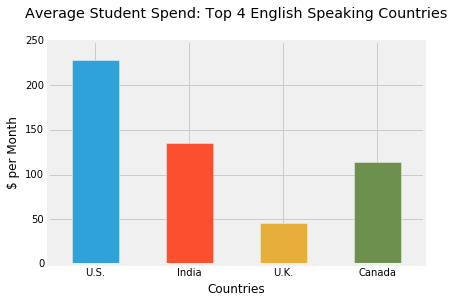

In [16]:
countries_mean['money_per_month'][['United States of America','India', 'United Kingdom', 'Canada']].plot.bar()
plt.xticks([0,1,2,3], ['U.S.','India','U.K.','Canada'],rotation=0)
plt.title('Average Student Spend: Top 4 English Speaking Countries', y=1.08)
plt.xlabel('Countries')
plt.ylabel('$ per Month')
plt.show()

The above indicates just how much the average citizen spends on learning the skills we offer.

There might be reason to suspect that the above averages might be off. All of the above countries as wealthy, but the UK is surprisingly lagging behind in respects of average money spent on learning.

It might be time to inspect if these numbers are indeed representative of the population as a whole.

## Determining Outliers


In [17]:
country_survey.isnull().sum()

Age                         51
AttendedBootcamp            28
BootcampFinish            5879
BootcampLoanYesNo         5874
BootcampName              5912
BootcampRecommend         5874
ChildrenNumber            5349
CityPopulation              51
CodeEventConferences      5799
CodeEventDjangoGirls      6163
CodeEventFCC              5540
CodeEventGameJam          6124
CodeEventGirlDev          6104
CodeEventHackathons       5594
CodeEventMeetup           5346
CodeEventNodeSchool       6112
CodeEventNone             5748
CodeEventOther            6017
CodeEventRailsBridge      6170
CodeEventRailsGirls       6171
CodeEventStartUpWknd      6072
CodeEventWkdBootcamps     6018
CodeEventWomenCode        6007
CodeEventWorkshops        5637
CommuteTime               3139
CountryCitizen              36
CountryLive                  0
EmploymentField           3708
EmploymentFieldOther      5680
EmploymentStatus           518
                          ... 
ResourceOdinProj          5788
Resource

In [18]:
top_four = country_survey[country_survey['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


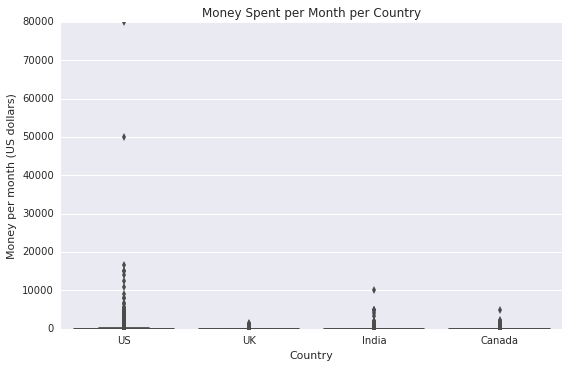

In [22]:
#plotting the top four
import seaborn as sns
sns.boxplot(y='money_per_month',x='CountryLive', data=top_four)
plt.title('Money Spent per Month per Country')
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

The box plot above seems to indicate that there some extreme outliers present in those who responded saying they were living in the U.S.

In [33]:
over_20k = country_survey[country_survey['money_per_month']>20000]

over_20k[['CountryLive','money_per_month']]

,CountryLive,money_per_month
2478,United States of America,50000.0
6835,Spain,40000.0
13795,Puerto Rico,30000.0
14024,United States of America,80000.0


Education is expensive in America, but it's a little hard to believe that people are out there spending north of $50k a month in learning new skills.

Safe to say, these data points are way outside the norm and should be dropped from further analysis.

In [39]:
country_survey = country_survey[country_survey['money_per_month']<20000]

#lets take a look at what the means look like now
countries_mean = country_survey.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America','India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

This has seemed to tamp down the average spend on education for the U.S., but we should take a look at the box plots once more to get a better grasp of the data points present.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


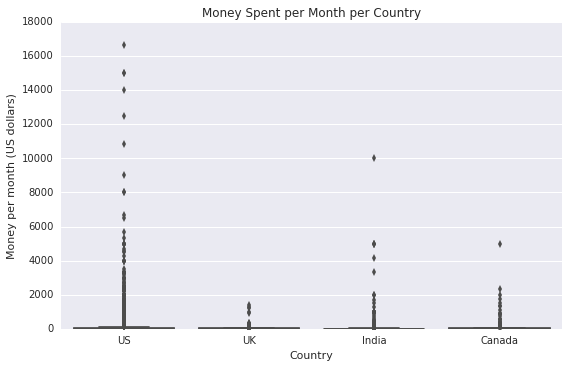

In [40]:
top_four = country_survey[country_survey['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

sns.boxplot(y='money_per_month',x='CountryLive', data=top_four)
plt.title('Money Spent per Month per Country')
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Though we were able to shave down a couple of extreme values, we're still seeing quite a few data points that suggest respondents were spending on average north of $5,000 dollars a month on their education. 

These points could come from students who are currently attending schools of higher education (post high school). Think colleges, post-barraculate (grad school), and even less conventional educational programs: bootcamps.

Specifically, coding bootcamps. They're easy enough to enroll into and would align well with those who decided to respond to the survey.

Let's determine how many respondents of this subset have indicated that they had participated in a bootcamp of some sort.

In [43]:
top_four_bootcamp = top_four['AttendedBootcamp'].value_counts()
top_four_bootcamp

0.0    3635
1.0     261
Name: AttendedBootcamp, dtype: int64